In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# Load in final dataset
df_final_data = pd.read_csv('kc_housing_model_df_final_data.csv')

In [15]:
df_final_data.describe()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode,...,sca_sqft_lot15,sca_bedrooms,sca_bathrooms,codebins_yrbuilt,codebins_sqftbasement,codebins_sqftabove,codezipcode,lat,long,id
count,21597.000000,1.905300e+04,19053.000000,19053.000000,19053.000000,1.905300e+04,19053.000000,19053.000000,19053.000000,19053.000000,...,19053.000000,19053.000000,19053.000000,19053.000000,19053.000000,19053.000000,19053.000000,21597.000000,21597.000000,2.159700e+04
mean,10798.000000,4.681033e+05,3.293025,2.017136,1928.589513,1.403172e+04,1.468142,3.411746,7.496720,98078.540177,...,0.945326,0.293025,0.017136,6.510996,0.692122,2.836824,35.385136,47.560093,-122.213982,4.580474e+09
std,6234.661218,1.999766e+05,0.780532,0.659094,699.470303,3.882067e+04,0.536934,0.647548,0.978593,53.503720,...,5.210258,0.780532,0.659094,2.915214,0.998476,1.372966,19.205842,0.138552,0.140724,2.876736e+09
min,0.000000,7.800000e+04,2.000000,0.750000,440.000000,5.200000e+02,1.000000,1.000000,4.000000,98001.000000,...,-1.444515,-1.000000,-1.250000,0.000000,0.000000,0.000000,0.000000,47.155900,-122.519000,1.000102e+06
25%,5399.000000,3.135000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,3.000000,7.000000,98033.000000,...,-0.523268,0.000000,-0.500000,5.000000,0.000000,2.000000,21.000000,47.471100,-122.328000,2.123049e+09
50%,10798.000000,4.310000e+05,3.000000,2.000000,1830.000000,7.490000e+03,1.000000,3.000000,7.000000,98065.000000,...,0.000000,0.000000,0.000000,7.000000,0.000000,2.000000,34.000000,47.571800,-122.231000,3.904930e+09
75%,16197.000000,5.890000e+05,4.000000,2.500000,2380.000000,1.018200e+04,2.000000,4.000000,8.000000,98118.000000,...,0.476732,1.000000,0.500000,9.000000,1.000000,4.000000,52.000000,47.678000,-122.125000,7.308900e+09
max,21596.000000,1.120000e+06,5.000000,3.500000,4230.000000,1.651359e+06,3.500000,5.000000,11.000000,98199.000000,...,116.467888,2.000000,1.500000,11.000000,5.000000,8.000000,69.000000,47.777600,-121.315000,9.900000e+09


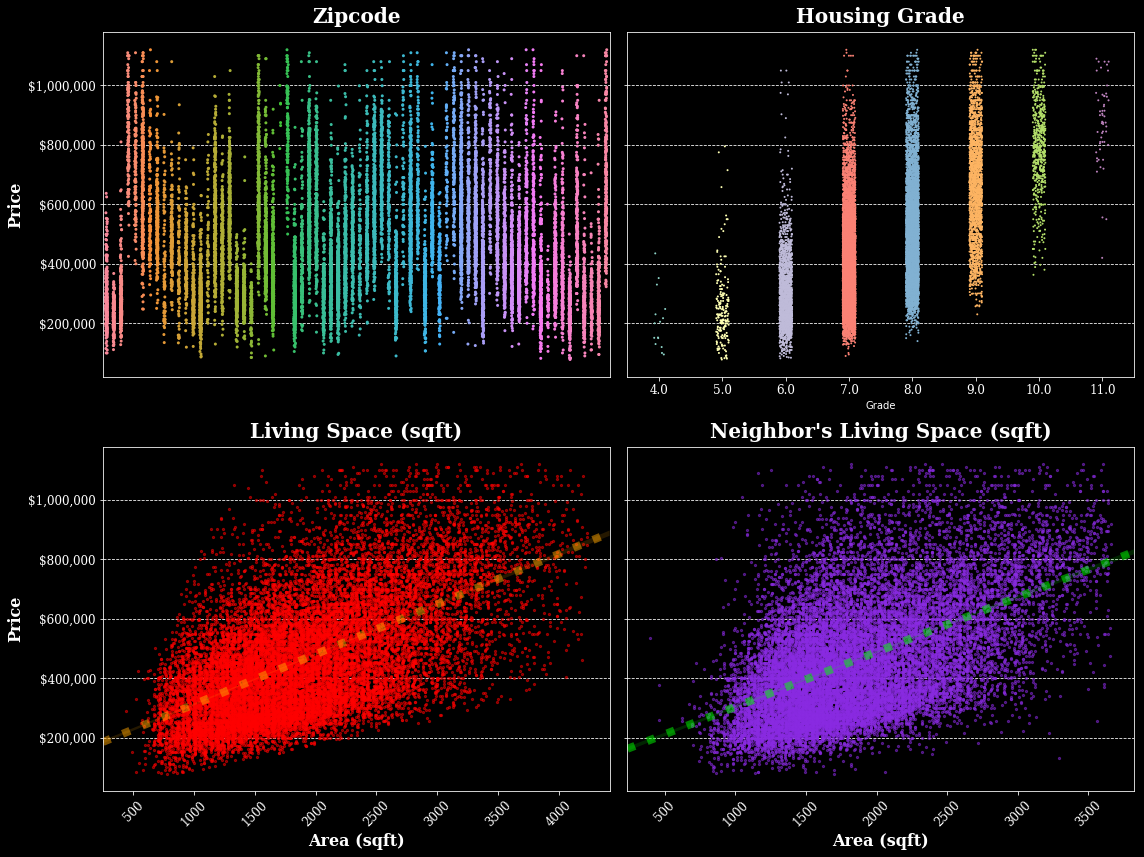

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.style.use('dark_background')

# Define the figure and axes and the # of subplots, sharing the y axes
fig, ax = plt.subplots(figsize=(16,12), ncols=2, nrows=2, sharey=True)

## Defining Formatting to be Used

# Formatting dollar sign labels
fmtPrice = '${x:,.0f}'
tickPrice = mtick.StrMethodFormatter(fmtPrice)

# Axis Label fonts
fontTitle = {'fontsize': 20,
           'fontweight': 'bold',
            'fontfamily':'serif'}

fontAxis = {'fontsize': 16,
           'fontweight': 'bold',
            'fontfamily':'serif'}

fontTicks = {'fontsize': 12,
           'fontweight':'medium',
            'fontfamily':'serif'}

# The amount of space above titles
y_title_margin = 1.01

# Major title
# plt.suptitle("Critical Factors for Predicting Sales Price", y = 1.0, fontdict=fontTitle, fontsize=22)


## Subplot 1
i,j=0,0
ax[i,j].set_title("Zipcode",y = y_title_margin,fontdict=fontTitle)#, y = y_title_margin)
sns.stripplot(df_final_data['zipcode'],df_final_data['price'],ax=ax[i,j],marker='o',size=3)

# Remove xticks
ax[i,j].set_xticks([]), ax[i,j].set_xlabel('')

# Change y-tick labels
ax[i,j].set_ylabel('Price',fontdict=fontAxis)

yticklab = ax[i,j].get_yticklabels()
ax[i,j].set_yticklabels(yticklab,fontdict=fontTicks)
ax[i,j].get_yaxis().set_major_formatter(tickPrice)

# Set y-grid
ax[i, j].set_axisbelow(True)
ax[i, j].grid(axis='y',ls='--')



## Subplot 2
i,j = 0,1
ax[i,j].set_title("Housing Grade",y = y_title_margin,fontdict=fontTitle)
ax[i,j].title.set_fontsize(20)
sns.stripplot(df_final_data['grade'],df_final_data['price'],ax=ax[i,j],marker='o',size=2)

#Set x axis
xticklab=ax[i,j].get_xticklabels()
ax[i,j].set_xticklabels(xticklab,fontdict=fontTicks)
ax[i,j].set_xlabel('Grade')


# Change y-tick labels
ax[i,j].set_ylabel('')# 'Price',fontdict=fontAxis)

# Set y-grid
ax[i, j].set_axisbelow(True)
ax[i, j].grid(axis='y',ls='--')


yticklab = ax[i,j].get_yticklabels()
ax[i,j].set_yticklabels(yticklab,fontdict=fontTicks)
ax[i,j].get_yaxis().set_major_formatter(tickPrice) 


## Subplot 3
i,j = 1,0

# Title
ax[i,j].set_title("Living Space (sqft)",y = y_title_margin,fontdict=fontTitle)
ax[i,j].title.set_fontsize(20)

# Define the scatter plot and line graph aesthetics
line_kws={"color":"orange","alpha":0.5,"lw":8,"ls":":"}
scatter_kws={'s': 5, 'alpha': 0.5,'marker':'.','color':'red'}


# Plot seaborn plot 
sns.regplot(df_final_data['sqft_living'], df_final_data['price'],ax=ax[i,j], scatter_kws=scatter_kws, line_kws=line_kws) #,marker='o',size=2) 
# sns.stripplot(df_final_data['sqft_living'], df_final_data['price'],ax=ax[i,j],marker='.') #,marker='o',size=2)


## Change the x-axis 
ax[i,j].set_xlabel('Area (sqft)',fontdict=fontAxis)



# Get ticks, rotate labels, and return
# xticks = ax[i,j].get_xticks()
xticklab=ax[i,j].get_xticklabels()
ax[i,j].set_xticklabels(xticklab,fontdict=fontTicks, rotation=45)

# Change the major units of x-axis
ax[i,j].xaxis.set_major_locator(mtick.MultipleLocator(500))
ax[i,j].xaxis.set_major_formatter(mtick.ScalarFormatter())

## Change y-axis
# Change y-tick labels
ax[i,j].set_ylabel('Price',fontdict=fontAxis)

yticklab = ax[i,j].get_yticklabels()
ax[i,j].set_yticklabels(yticklab,fontdict=fontTicks)
ax[i,j].get_yaxis().set_major_formatter(tick) 

# Set y-grid
ax[i, j].set_axisbelow(True)
ax[i, j].grid(axis='y',ls='--')



# ## Subplot 4
i,j = 1,1
ax[i,j].set_title("Neighbor's Living Space (sqft)",y = y_title_margin,fontdict=fontTitle)
ax[i,j].title.set_fontsize(20)

# Define the scatter plot and line graph aesthetics
line_kws={"color":"lime","alpha":0.5,"lw":8,"ls":":"}
scatter_kws={'s': 5, 'alpha': 0.5,'marker':'.','color':'blueviolet'}

# Plot seaborn plot 
sns.regplot(df_final_data['sqft_living15'], df_final_data['price'],ax=ax[i,j], scatter_kws=scatter_kws, line_kws=line_kws)

# Change the x-axis labels
ax[i,j].set_xlabel('Area (sqft)',fontdict=fontAxis)

# Get ticks, rotate labels, and return
xticklab=ax[i,j].get_xticklabels()
ax[i,j].set_xticklabels(xticklab,fontdict=fontTicks, rotation=45)

# Change the major units of x-axis
ax[i,j].xaxis.set_major_locator(mtick.MultipleLocator(500))
ax[i,j].xaxis.set_major_formatter(mtick.ScalarFormatter())

# Change y-tick labels
ax[i,j].set_ylabel('')#Price',fontdict=fontAxis)

yticklab = ax[i,j].get_yticklabels()
ax[i,j].set_yticklabels(yticklab,fontdict=fontTicks)
ax[i,j].get_yaxis().set_major_formatter(tick) 

# Set y-grid
ax[i, j].set_axisbelow(True)
ax[i, j].grid(axis='y',ls='--')

plt.tight_layout()
plt.savefig("summary_figure.png") # save as png